## Does the presence of the HLA-DQB03:01 allele show differences in J24 Usage?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm

### Look at all subjects' HLA alleles

In [2]:
HLA_path = "/labs/mignot/DGN_HLA_CALLS_OCT2019.txt"

In [3]:
HLA_df = pd.read_csv(HLA_path)

In [4]:
HLA_df['patid'] = HLA_df['PLATEID'].apply(lambda x: x.split("_")[-1])
HLA_df = HLA_df[HLA_df['patid'].str.startswith("LD")]
HLA_df['patid'] = HLA_df['patid'].apply(lambda x: int(x[2:]))
HLA_df = HLA_df.drop(["PLATEID"], axis=1)
HLA_df = HLA_df.set_index("patid")
HLA_df.head()

,HLA_A_A1,HLA_A_A2,HLA_A_PROB,HLA_B_A1,HLA_B_A2,HLA_B_PROB,HLA_C_A1,HLA_C_A2,HLA_C_PROB,HLA_DPB1_A1,...,HLA_DPB1_PROB,HLA_DQA1_A1,HLA_DQA1_A2,HLA_DQA1_PROB,HLA_DQB1_A1,HLA_DQB1_A2,HLA_DQB1_PROB,HLA_DRB1_A1,HLA_DRB1_A2,HLA_DRB1_PROB
patid,,,,,,,,,,,,,,,,,,,,,
14,01:01,31:01,0.998,35:01,44:02,0.935,04:01,05:01,1.000,04:01,...,0.934,01:01,03:01,0.918,03:02,05:01,0.988,01:01,04:01,0.961
41,25:01,26:01,0.907,18:01,38:01,0.938,12:03,12:03,0.989,04:01,...,0.809,01:02,03:01,0.969,03:02,06:02,0.988,04:02,15:01,0.830
38,02:06,25:01,0.676,08:01,27:05,0.865,03:03,07:01,0.464,01:01,...,0.984,01:02,05:01,0.988,02:01,06:02,0.977,03:01,15:01,1.000
84,01:01,03:01,0.992,07:02,52:01,0.995,07:02,12:02,1.000,04:01,...,0.990,01:02,01:03,0.999,06:01,06:02,0.994,15:01,15:02,0.999
22,01:01,68:01,0.996,08:01,44:02,0.999,07:01,07:04,0.999,04:01,...,0.809,01:01,03:01,0.976,03:02,05:01,0.986,01:01,04:04,0.837


In [5]:
HLA_DQB1_df = HLA_df[['HLA_DQB1_A1', 'HLA_DQB1_A2', 'HLA_DQB1_PROB']]
HLA_DQB1_df

,HLA_DQB1_A1,HLA_DQB1_A2,HLA_DQB1_PROB
patid,,,
14,03:02,05:01,0.988
41,03:02,06:02,0.988
38,02:01,06:02,0.977
84,06:01,06:02,0.994
22,03:02,05:01,0.986
...,...,...,...
1282,03:01,03:01,0.997
1271,03:03,06:03,0.899
1252,06:02,06:03,0.966


In [6]:
# everyone who has one copy of 06:02
HLA_DQB1_0602_df = HLA_DQB1_df[(HLA_DQB1_df['HLA_DQB1_A1'] == "06:02") | (HLA_DQB1_df['HLA_DQB1_A2'] == "06:02")]
# remove homozygous 06:02
HLA_DQB1_0602_df = HLA_DQB1_0602_df[~((HLA_DQB1_0602_df['HLA_DQB1_A1'] == "06:02") & (HLA_DQB1_0602_df['HLA_DQB1_A2'] == "06:02"))]

In [7]:
HLA_DQB1_0602_df['0301_present'] = (HLA_DQB1_0602_df['HLA_DQB1_A1'] == "03:01") | (HLA_DQB1_0602_df['HLA_DQB1_A2'] == "03:01")

In [8]:
HLA_DQB1_0602_df.head()

,HLA_DQB1_A1,HLA_DQB1_A2,HLA_DQB1_PROB,0301_present
patid,,,,
41,03:02,06:02,0.988,False
38,02:01,06:02,0.977,False
84,06:01,06:02,0.994,False
157,05:01,06:02,0.990,False
11,03:01,06:02,0.980,True


In [9]:
HLA_DQB1_df['HLA_dose'] = HLA_DQB1_df['HLA_DQB1_A1'].apply(lambda x: 1 if x == "03:01" else 0)+HLA_DQB1_df['HLA_DQB1_A2'].apply(lambda x: 1 if x == "03:01" else 0)

/home/ashteng/36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
HLA_DQB1_df.head()

,HLA_DQB1_A1,HLA_DQB1_A2,HLA_DQB1_PROB,HLA_dose
patid,,,,
14,03:02,05:01,0.988,0
41,03:02,06:02,0.988,0
38,02:01,06:02,0.977,0
84,06:01,06:02,0.994,0
22,03:02,05:01,0.986,0


Confirm that 03:01 is present in some people for both alleles

In [11]:
HLA_DQB1_df['HLA_DQB1_A1'].unique()

array(['03:02', '02:01', '06:01', '03:01', '02:02', '05:01', '05:02',
       '06:02', '05:03', '06:03', '04:02', '03:03', '06:04', '03:04'],
      dtype=object)

In [12]:
HLA_DQB1_df['HLA_DQB1_A2'].unique()

array(['05:01', '06:02', '06:04', '03:01', '05:03', '03:02', '02:01',
       '05:04', '03:03', '06:09', '05:02', '02:02', '06:03', '04:02',
       '03:04', '06:01', '03:19'], dtype=object)

Confirm that most calls are high probability

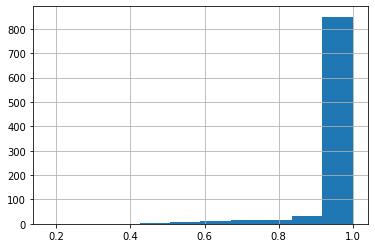

In [13]:
HLA_DQB1_df['HLA_DQB1_PROB'].hist()

### We want to associate HLA genotype to J24 Usage, so load all subjects' J24 usage

In [14]:
J_df = pd.read_csv("allJRatios.csv", index_col=0)

In [15]:
J_df

,patid,transcript,ratio
0,796,TRAJ09*01,0.026688
1,796,TRAJ54*01,0.036107
2,796,TRAJ53*01,0.009419
3,796,TRAJ52*01,0.031397
4,796,TRAJ06*01,0.034537
...,...,...,...
55315,691,TRAJ34*01,0.025373
55316,691,TRAJ50*01,0.002985
55317,691,TRAJ15*02,0.000000
55318,691,TRAJ07*01,0.025373


In [16]:
J_HLA_df = pd.merge(HLA_DQB1_df, J_df, on="patid", how="inner")

In [19]:
J_HLA_df

,patid,HLA_DQB1_A1,HLA_DQB1_A2,HLA_DQB1_PROB,HLA_dose,transcript,ratio
0,14,03:02,05:01,0.988,0,TRAJ09*01,0.035654
1,14,03:02,05:01,0.988,0,TRAJ54*01,0.006791
2,14,03:02,05:01,0.988,0,TRAJ53*01,0.023769
3,14,03:02,05:01,0.988,0,TRAJ52*01,0.039049
4,14,03:02,05:01,0.988,0,TRAJ06*01,0.032258
...,...,...,...,...,...,...,...
55315,102,03:01,06:02,0.984,1,TRAJ34*01,0.027523
55316,102,03:01,06:02,0.984,1,TRAJ50*01,0.009174
55317,102,03:01,06:02,0.984,1,TRAJ15*02,0.000000
55318,102,03:01,06:02,0.984,1,TRAJ07*01,0.000000


In [74]:
def get_transcript_df(transcript):
    transcript_df = J_HLA_df[J_HLA_df['transcript'] == transcript]
    quantile_low, quantile_high = transcript_df["ratio"].quantile([0.025, 0.975]).values
    transcript_df = transcript_df[(transcript_df["ratio"] > quantile_low) & (transcript_df["ratio"] < quantile_high)]
    return transcript_df

In [75]:
def plot_df(plot_df, plot_column_name):
    fig, ax = plt.subplots()
    sns.violinplot(x="HLA_dose", y="ratio", data=plot_df, ax=ax)
    sns.regplot(x="HLA_dose", y="ratio", data=plot_df, x_estimator=np.median, color="yellow", ax=ax, label="Median Estimator")
    plt.title(transcript)
    plt.legend()

In [76]:
def regress_get_pvalue(plot_df, plot_column_name, covariates=True):
    if covariates:
        X = plot_df.loc[:, ["HLA_dose", "C1", "C2", "C3", "C4"]].values
    else:
        X = plot_df.loc[:, ["HLA_dose"]].values
    y = plot_df[plot_column_name].values
    XX = sm.add_constant(X)
    mod = sm.OLS(y, XX)
    res = mod.fit()
#     print('Parameters: ', res.params)
#     print('R2: ', res.rsquared)
#     print('p values:', res.pvalues)
    return res.pvalues[1]

In [77]:
for transcript in J_HLA_df['transcript'].unique():
    try:
        transcript_df = get_transcript_df(transcript)
        p = regress_get_pvalue(transcript_df, "ratio", covariates=False)
        if p < 0.05:
            print(transcript, p, "*")
        else:
            print(transcript, p)
    except:
        continue

TRAJ09*01 0.39288061005702035
TRAJ54*01 0.11514544071325318
TRAJ53*01 0.42583938013739797
TRAJ52*01 0.7415763673660153
TRAJ06*01 0.49155234271718196
TRAJ29*01 0.161817949541477
TRAJ41*01 0.2053830901929211
TRAJ37*01 0.39120173386942714
TRAJ17*01 0.0038447787676039223 *
TRAJ21*01 0.699847802673728
TRAJ35*01 0.5992019212749928
TRAJ47*01|02 0.6501894901259127
TRAJ14*01 0.6938633820049533
TRAJ11*01 0.16677864513211993
TRAJ15*01 0.35567076661859454
TRAJ39*01 0.9549614144077949
TRAJ61*01 0.16089865336842368
TRAJ16*01 0.000676465542754834 *
TRAJ30*01 0.3238565654480511
TRAJ12*01 0.7172121079306522
TRAJ27*01 0.5511988994897951
TRAJ18*01 0.9329801458896587
TRAJ33*01 0.729212365355375
TRAJ44*01 0.3693364035950937
TRAJ13*02 0.6958162819746634
TRAJ46*01 0.279921474004516
TRAJ22*01 0.3287692626072708
TRAJ24*01 0.9046659772659587
TRAJ04*01 0.4275164134677306
TRAJ40*01 0.6780393247394072
TRAJ05*01 0.19758564836519651
TRAJ58*01 0.09689057899121245
TRAJ43*01 0.48131149318954003
TRAJ38*01 0.224005269270

In [54]:
# for genotype in ["GG", "CC", "GC"]:
#     fig, ax = plt.subplots()
#     df = J24_HLA_df[J24_HLA_df["genotype"]==genotype]
#     sns.violinplot(x="HLA_dose", y="summed_ratio", data=df, ax=ax)
#     sns.regplot(x="HLA_dose", y="summed_ratio", data=df, x_estimator=np.mean, color="yellow", ax=ax, label="Median Estimator")
#     #sns.scatterplot(x="dose", y=summed_plot_column, data=plot_df)
#     plt.legend()
#     plt.xlabel("HLA-DQB03:01 dose")
#     plt.ylabel("J24 Usage")
#     regression_p_value = regress(df, "normalized_summed_ratio", covariates=True)
#     plt.title("{}, n = {}, p = {}".format(genotype, len(df), regression_p_value))
#     #plt.title("BLAST {} {}".format(query_transcripts, plot_column_name))

In [ ]:
# for genotype in ["CC", "GG"]:
#     fig, ax = plt.subplots()
#     df = J24_HLA_df[J24_HLA_df["genotype"]!=genotype]
#     sns.violinplot(x="HLA_dose", y="summed_ratio", data=df, ax=ax)
#     sns.regplot(x="HLA_dose", y="summed_ratio", data=df, x_estimator=np.mean, color="yellow", ax=ax, label="Median Estimator")
#     #sns.scatterplot(x="dose", y=summed_plot_column, data=plot_df)
#     plt.legend()
#     plt.xlabel("HLA-DQB03:01 dose")
#     plt.ylabel("J24 Usage")
#     regression_p_value = regress(df, "normalized_summed_ratio", covariates=True)
#     if genotype == "CC":
#         plt.title("GG+GC, n = {}, p = {}".format(len(df), regression_p_value))
#     else:
#         plt.title("CC+CG, n = {}, p = {}".format(len(df), regression_p_value))
#     #plt.title("BLAST {} {}".format(query_transcripts, plot_column_name))

In [ ]:
# regress(J24_HLA_df, "normalized_summed_ratio")

In [ ]:
# fig, ax = plt.subplots()
# sns.violinplot(x="HLA_dose", y="summed_ratio", data=J24_HLA_df)

In [ ]:
# zero_arr = J24_HLA_df[J24_HLA_df['HLA_dose'] == 0]['summed_ratio']
# one_arr = J24_HLA_df[J24_HLA_df['HLA_dose'] == 1]['summed_ratio']
# two_arr = J24_HLA_df[J24_HLA_df['HLA_dose'] == 2]['summed_ratio']

In [ ]:
# scipy.stats.kruskal(zero_arr, one_arr, two_arr)

In [ ]:
# len(zero_arr), len(one_arr), len(two_arr)

### See if the presence of the 0602 allele (not dose), affects J24 usage

In [ ]:
J24_df = pd.read_csv("J24_all.txt", index_col=0)

In [ ]:
J24_HLA_0602_df = pd.merge(HLA_DQB1_0602_df, J24_df, on="patid", how="inner")

We only care that we have the HLA_DQB1_A1 and HLA_DQB1_A2 columns, as well as summed_ratio/normalized_summed_ratio

In [ ]:
J24_HLA_0602_df

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.violinplot(x="0301_present", y="summed_ratio", data=J24_HLA_0602_df, ax=ax)
sns.regplot(x="0301_present", y="summed_ratio", data=J24_HLA_0602_df, x_estimator=np.median, color="yellow", ax=ax, label="Median Estimator")
plt.legend()

In [ ]:
len(HLA_DQB1_0602_df[HLA_DQB1_0602_df["0301_present"] == True])

In [ ]:
len(HLA_DQB1_0602_df[HLA_DQB1_0602_df["0301_present"] == False])

In [ ]:
true = J24_HLA_0602_df[J24_HLA_0602_df["0301_present"] == True]['summed_ratio'].values
false = J24_HLA_0602_df[J24_HLA_0602_df["0301_present"] == False]['summed_ratio'].values

In [ ]:
scipy.stats.mannwhitneyu(true, false)

In [ ]:
scipy.stats.ttest_ind(true, false)